# What is the sociodemographic composition of the European Parliament?

Data source: European Parliament

URL -- full list of the MEPs: http://www.europarl.europa.eu/meps/en/full-list/all

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import requests
from bs4 import BeautifulSoup
from urllib.request import urlopen
import xml.etree.ElementTree as et
import time
import dateutil
from datetime import datetime
from dateutil.relativedelta import relativedelta
from functools import reduce
import joypy
import seaborn as sns
import re

pd.set_option('max.rows', 800)

In [50]:
meps = pd.read_csv('data/DODS-EU_MEPwDoB-20190627-updated.csv', delimiter='\t', encoding = 'utf-8')
meps.head()

,Day,Month,Year,DoB,Full_name,Gender,Country,National_Party,National_Party_Abbreviation,European_Party_Group,European_Party_Group_Abbreviation
0,29.0,9.0,1936.0,29.09.36,Silvio Berlusconi,M,Italy,Forward Italy,FI,European People's Party,EPP
1,3.0,7.0,1940.0,03.07.40,Jerzy Karol Buzek,M,Poland,Civic Platform,PO,European People's Party,EPP
2,24.0,8.0,1971.0,24.08.71,Aileen McLeod,F,United Kingdom,Scottish National Party,SNP,Greens-European Free Alliance,Greens-EFA
3,18.0,5.0,1976.0,18.05.76,Abir Al-Sahlani,F,Sweden,Centre Party,C,Renew Europe,RE
4,13.0,8.0,1944.0,13.08.44,José Manuel García-Margallo y Marfil,M,Spain,People's Party,PP,European People's Party,EPP


In [51]:
meps.columns

Index(['Day', 'Month', 'Year', 'DoB', 'Full_name', 'Gender', 'Country',
       'National_Party', 'National_Party_Abbreviation', 'European_Party_Group',
       'European_Party_Group_Abbreviation'],
      dtype='object')

In [60]:
total_meps = 748

# column names
gender = 'Gender'
name = 'Full_name'
country = 'Country'

# variable names
female = 'F'
male = 'M'

In [54]:
# check whether gender value counts encompasses only binary options
# if not, go back to dataset to change input data
meps[gender].value_counts()

M    446
F    302
Name: Gender, dtype: int64

In [55]:
# check number of MEPs in incoming parliament
if len(meps) == total_meps:
    print("List includes all MEPs")

List includes all MEPs


# Analyse gender balance

In [30]:
meps.head()

,country,Title,First_name,Last_name,Incumbent,National_party,European_Party_Group,Biography
0,Austria,Ms,Karoline,Edtstadler,FALSE,Austrian People's Party,EPP,http://www.dodspeople.com/Page.aspx?pageid=420...
1,Austria,Mr,Othmar,Karas,TRUE,Austrian People's Party,EPP,http://www.dodspeople.com/Page.aspx?pageid=420...
2,Austria,Ms,Angelika,Winzig,FALSE,Austrian People's Party,EPP,http://www.dodspeople.com/Page.aspx?pageid=420...
3,Austria,Ms,Simone,Schmiedtbauer,FALSE,Austrian People's Party,EPP,http://www.dodspeople.com/Page.aspx?pageid=420...
4,Austria,Mr,Lukas,Mandl,TRUE,Austrian People's Party,EPP,http://www.dodspeople.com/Page.aspx?pageid=420...


In [58]:
# double-check whether value counts encompasses only binary options
meps[gender].value_counts()

M    446
F    302
Name: Gender, dtype: int64

In [61]:
meps_total = meps.groupby(by=country)[name].count().reset_index(name='number_meps')
meps_total

,Country,number_meps
0,Austria,18
1,Belgium,21
2,Bulgaria,17
3,Croatia,11
4,Cyprus,6
5,Czech Republic,21
6,Denmark,13
7,Estonia,6
8,Finland,13
9,France,74


In [62]:
meps_genders = meps.groupby(by=country)[gender].value_counts().reset_index(name='gender_count')
meps_genders

,Country,Gender,gender_count
0,Austria,F,9
1,Austria,M,9
2,Belgium,M,13
3,Belgium,F,8
4,Bulgaria,M,12
5,Bulgaria,F,5
6,Croatia,M,7
7,Croatia,F,4
8,Cyprus,M,6
9,Czech Republic,M,14


In [63]:
meps_female = meps_genders[meps_genders[gender]==female]
meps_female

,Country,Gender,gender_count
0,Austria,F,9
3,Belgium,F,8
5,Bulgaria,F,5
7,Croatia,F,4
10,Czech Republic,F,7
12,Denmark,F,6
14,Estonia,F,2
15,Finland,F,7
17,France,F,37
20,Germany,F,35


In [64]:
meps_male = meps_genders[meps_genders[gender]==male]
meps_male

,Country,Gender,gender_count
1,Austria,M,9
2,Belgium,M,13
4,Bulgaria,M,12
6,Croatia,M,7
8,Cyprus,M,6
9,Czech Republic,M,14
11,Denmark,M,7
13,Estonia,M,4
16,Finland,M,6
18,France,M,37


In [65]:
gender_groups = [meps_total, meps_female, meps_male]

gender_structure_countries_parties = reduce(lambda  left,right: pd.merge(left,right,on=[country],how='outer'), gender_groups)
gender_structure_countries_parties = gender_structure_countries_parties[[country,'number_meps','gender_count_x','gender_count_y']]
gender_structure_countries_parties.columns =([country,'number_meps','female_meps','male_meps'])
gender_structure_countries_parties

,Country,number_meps,female_meps,male_meps
0,Austria,18,9.0,9
1,Belgium,21,8.0,13
2,Bulgaria,17,5.0,12
3,Croatia,11,4.0,7
4,Cyprus,6,NaN,6
5,Czech Republic,21,7.0,14
6,Denmark,13,6.0,7
7,Estonia,6,2.0,4
8,Finland,13,7.0,6
9,France,74,37.0,37


In [66]:
gender_structure_countries_parties['share_male'] = round(gender_structure_countries_parties['male_meps']/gender_structure_countries_parties['number_meps']*100)
gender_structure_countries_parties['share_female'] = round(gender_structure_countries_parties['female_meps']/gender_structure_countries_parties['number_meps']*100)

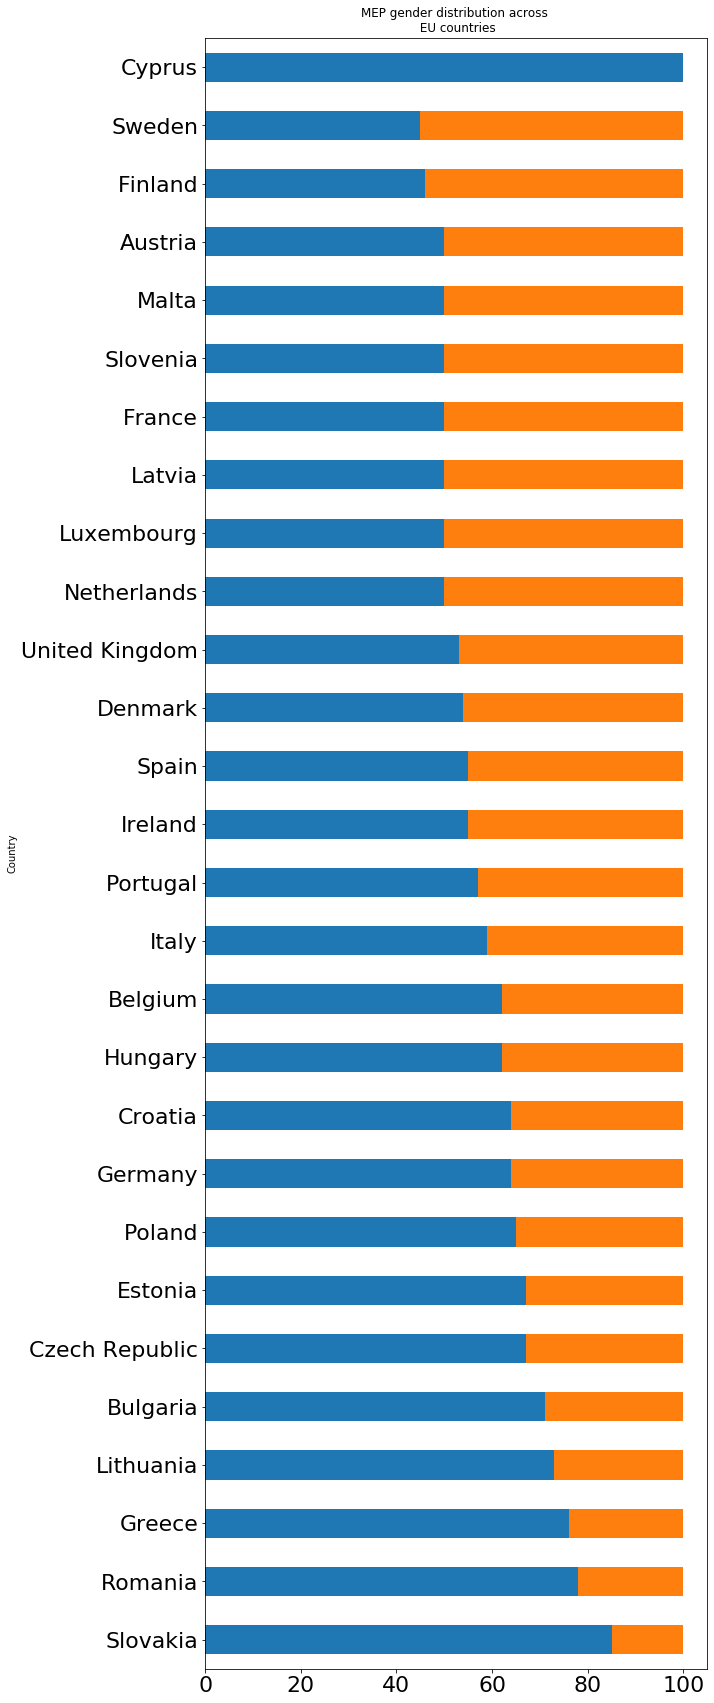

In [67]:
gender_structure_countries_parties[[country, 'share_male', 'share_female']].sort_values(by='share_female', ascending = True).plot(kind='barh',stacked = True,x=country, legend = False,figsize=(9,30), title="MEP gender distribution across \n EU countries",fontsize=22)
#plt.savefig('charts/drafts/gender-balance-by-country.pdf', transparent = True)

In [39]:
gender_structure_countries_parties.sort_values(by='share_female',ascending = False)

,country,number_meps,female_meps,male_meps,share_male,share_female
26,Sweden,20,11.0,9,45.0,55.0
8,Finland,13,7.0,6,46.0,54.0
0,Austria,18,9.0,9,50.0,50.0
15,Latvia,8,4.0,4,50.0,50.0
24,Slovenia,8,4.0,4,50.0,50.0
18,Malta,6,3.0,3,50.0,50.0
17,Luxembourg,6,3.0,3,50.0,50.0
9,France,74,37.0,37,50.0,50.0
21,Portugal,21,10.0,11,52.0,48.0
27,United Kingdom,73,34.0,39,53.0,47.0
